In [1]:
import csv
import cv2
import numpy as np

In [2]:
lines = []

with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

lines = lines[1:]

print('done')

done


In [3]:
images = []
measurements = []
correction = 0.2

for line in lines:
    measurement = float(line[3]) # steering angle
    # center
    source_path = line[0]
    filename = source_path.split('/')[-1]
    originalImage = cv2.imread('data/IMG/' + filename)
    image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    images.append(image)
    measurements.append(measurement)
    # left
    source_path = line[1]
    filename = source_path.split('/')[-1]
    originalImage = cv2.imread('data/IMG/' + filename)
    image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    images.append(image)
    measurements.append(measurement + correction)
    # right
    source_path = line[2]
    filename = source_path.split('/')[-1]
    originalImage = cv2.imread('data/IMG/' + filename)
    image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    images.append(image)
    measurements.append(measurement - correction)
    
print('done')

done


In [4]:
augmented_images = []
augmented_measurements = []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*(-1.0))
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

print(len(X_train))
print(len(y_train))
print('done')

48216
48216
done


In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160, 320, 3))) # set up lambda layer
model.add(Cropping2D(cropping=((50,25),(0,0))))
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
# model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
# model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(50))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
saved_model = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model.h5')

print('done')

C:\Users\54738\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\54738\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  if sys.path[0] == '':
C:\Users\54738\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
C:\Users\54738\Anaconda3\envs\carnd-term1\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 874s 23ms/step - loss: 0.1239 - val_loss: 0.0198
Epoch 2/5
38572/38572 [==============================] - 868s 22ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 3/5
38572/38572 [==============================] - 875s 23ms/step - loss: 0.0179 - val_loss: 0.0188
Epoch 4/5
38572/38572 [==============================] - 869s 23ms/step - loss: 0.0167 - val_loss: 0.0218
Epoch 5/5
38572/38572 [==============================] - 864s 22ms/step - loss: 0.0157 - val_loss: 0.0191
done


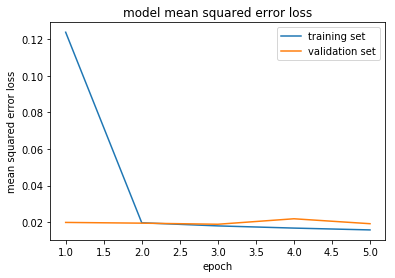

In [2]:
# from keras.models import Model
import matplotlib.pyplot as plt

loss = [0.1239, 0.0196, 0.0179, 0.0167, 0.0157]
val_loss = [0.0198, 0.0194, 0.0188, 0.0218, 0.0191]

### plot the training and validation loss for each epoch
plt.plot([1, 2, 3, 4, 5], loss)
plt.plot([1, 2, 3, 4, 5], val_loss)
# plt.plot(saved_model.history['loss'])
# plt.plot(saved_model.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()